In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Dataset Life Expectancy 

In [2]:
life_expectancy = pd.read_csv('Life Expectancy Data.csv')

## Read the dataset

In [3]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Drop the categorical column

In [4]:
life_expectancy=life_expectancy.drop(columns=['Country','Status'])

## Check for Null values

In [6]:
life_expectancy.isna().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

#### Drop Them

In [7]:
life_expectancy=life_expectancy.dropna()

In [8]:
life_expectancy.isna().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# Define function to calculate Variance and Bias

In [9]:
# calculate variance and bias for a given model
def calc_var_bias(features,df,label,no_of_samples):
    # make a list of all three
    variance = []
    bias = []
    number_of_features = []
    # run a loop for number of features to be selected
    for j in np.arange(1,df.shape[1]):
        # increase features one by one 
        X= features.iloc[:,0:j]
        # decide label
        y= df[label]
        # define no. of samples to be selected of population
        k = no_of_samples
        # prediction list
        predictions = []
        # make and empty dataframe and append predicted values
        pred_df = pd.DataFrame()
        # split the data
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.35,random_state = 3)
        
        #run a loop to split the no of samples to be selected
        for i in np.arange(k):
            
            # fit the model
            lm = LinearRegression().fit(X_train,y_train)
            #predict using test dataset
            y_hat = lm.predict(X_test)
            # append in the list
            predictions.append(y_hat)
            # concatenate the prediction to df in columns
            pred_df = pd.concat([pred_df,pd.DataFrame(predictions[i])],axis = 1)

        # Assign an empty array to caculate var  
        var = np.array([])
        
        # run a loop to calculate variance 
        for i in np.arange(pred_df.shape[0]):
            ## append var
            var = np.append(var,np.var(pred_df.iloc[i,:]))
            
        # calculate mean of prediction
        pred_df ['rowmean'] = pred_df.mean(axis = 1)
        # calculate bias
        gap = np.array(y_test)-np.array(pred_df.rowmean)
        # append all of these to lists
        variance.append(np.mean(var))
        bias.append(np.mean(gap**2))
        number_of_features.append(j)
    return variance,bias,number_of_features

### Select features

In [10]:
life_expectancy_features=life_expectancy.drop(columns='Life expectancy ')

### call the function

In [11]:
life_var,life_bias,life_features = calc_var_bias(life_expectancy_features,life_expectancy,'Life expectancy ',5)

## Plot Bias Vs Model complexity

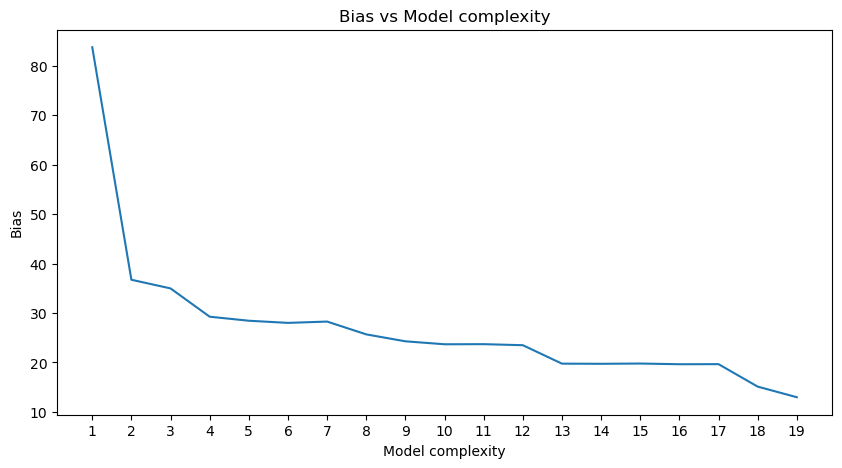

In [12]:
plt.figure(figsize = (10,5))
plt.plot(life_features,life_bias)
plt.xticks(range(1,20))
plt.xlabel('Model complexity')
plt.ylabel('Bias')
plt.title('Bias vs Model complexity')
plt.show()

## As model complexity increase Bias is reducing

### Plot Variance Vs Model Complexity

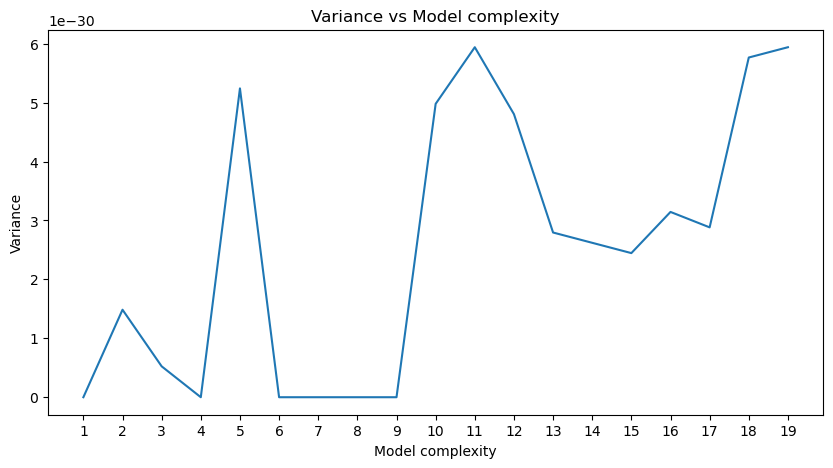

In [14]:
plt.figure(figsize = (10,5))
plt.plot(life_features,life_var)
plt.xticks(range(1,20))
plt.xlabel('Model complexity')
plt.ylabel('Variance')
plt.title('Variance vs Model complexity')
plt.show()

If you observe a pattern where the variance of our model first increases, then decreases, then increases again, and finally continues to increase continuously, it suggests that our model is going through different stages of complexity and performance.

Here's a possible explanation for this pattern:

Initial Stage: Low Complexity, High Bias - At the beginning, our model has low complexity, which means it is too simple to capture the underlying patterns in the data. Consequently, the model suffers from high bias, leading to underfitting. In this stage, the variance is low because the model is consistently producing similar predictions, albeit with poor accuracy.

Increasing Complexity: Decreasing Bias, Increasing Variance - As we increase the complexity of our model, it gains more capacity to capture intricate patterns in the data. This helps in reducing bias, allowing the model to fit the training data better. However, as the complexity increases, the model becomes more sensitive to the specific training instances it encounters. This leads to an increase in variance, as the predictions start to vary across different subsets of the training data.

Optimal Complexity: Balanced Bias and Variance - There comes a point where increasing the model complexity helps to strike a balance between bias and variance, leading to optimal performance. In this stage, the model achieves a good trade-off between capturing the underlying patterns in the data and generalizing well to unseen examples. The variance is relatively low because the model produces consistent and accurate predictions across different subsets of the data.

Overfitting: Increasing Complexity, High Variance - If you continue to increase the model complexity beyond the optimal point, the model starts to overfit the training data. It becomes too specialized to the noise and random fluctuations present in the training instances. As a result, the model's predictions become highly sensitive to the training data, leading to an increase in variance.

Continuous Increase in Complexity: Continuously Increasing Variance - If you keep pushing the model's complexity even further, without appropriate regularization or model selection techniques, the variance will continue to increase. The model becomes excessively flexible and fails to generalize well to unseen data. It memorizes the noise and random fluctuations, resulting in highly variable predictions across different subsets of the training data.

To achieve the best model performance, you need to identify the optimal level of complexity, where the bias and variance are balanced. Regularization techniques like L1/L2 regularization, dropout, or early stopping can help prevent overfitting and control the model's complexity, leading to improved generalization on unseen data.